In [9]:
!python -m venv ../pykan-env
!source ../pykan-env/bin/activate  # On Windows use `pykan-env\Scripts\activate`
!pip install pykan==0.0.5
!pip install moviepy --upgrade
!pip install ffmpeg --upgrade
!pip install --upgrade decorator==4.4.2

'source' is not recognized as an internal or external command,
operable program or batch file.


You should consider upgrading via the 'c:\users\ab-smart\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Requirement already up-to-date: moviepy in c:\users\ab-smart\appdata\local\programs\python\python39\lib\site-packages (2.1.1)


You should consider upgrading via the 'c:\users\ab-smart\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Requirement already up-to-date: ffmpeg in c:\users\ab-smart\appdata\local\programs\python\python39\lib\site-packages (1.4)


You should consider upgrading via the 'c:\users\ab-smart\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Requirement already up-to-date: decorator==4.4.2 in c:\users\ab-smart\appdata\local\programs\python\python39\lib\site-packages (4.4.2)


You should consider upgrading via the 'c:\users\ab-smart\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [10]:
from kan import *
import torch
torch.cuda.empty_cache()
from sklearn.metrics import mean_absolute_error



In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
print(device)



cuda


In [12]:
model1_dataset = torch.load('..\Data\Dataset_Electric_Motor.pt')

# If the .pt file contains a tensor, you can directly use it
print(model1_dataset)


C:\Users\AB-SMART\AppData\Local\Temp\ipykernel_7484\3969171562.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1_dataset = torch.load('..\Data\Dataset_Electric_Moto

{'train_input': tensor([[0.7496, 0.8766, 0.7332, 0.9423],
        [0.8101, 0.5755, 0.6911, 0.9620],
        [0.6527, 0.6322, 0.6888, 0.9630],
        ...,
        [0.8604, 0.0488, 0.7077, 0.9548],
        [0.7322, 0.9404, 0.9375, 0.7420],
        [0.7376, 0.5663, 0.7529, 0.0687]], device='cuda:0'), 'test_input': tensor([[0.9698, 0.8303, 0.7896, 0.9076],
        [0.9710, 0.8028, 0.7842, 0.9114],
        [0.9924, 0.8021, 0.8092, 0.8930],
        ...,
        [0.8610, 0.2674, 0.3456, 0.9756],
        [0.8513, 0.2793, 0.3861, 0.9869],
        [0.8624, 0.2770, 0.4074, 0.9913]], device='cuda:0'), 'train_label': tensor([[ -99.4771,  202.1833],
        [ -86.0031,  136.9308],
        [-123.5723,  153.2890],
        ...,
        [ -69.8333,   11.4977],
        [-101.0562,  182.0950],
        [ -31.1141,  102.7625]], device='cuda:0'), 'test_label': tensor([[-50.3599, 179.5043],
        [-49.9917, 174.5502],
        [-44.2135, 170.9831],
        ...,
        [-55.0770,  74.7324],
        [-61.086

In [13]:
image_folder = '../Images/video_img/'

kan_model = KAN(width=[4,2, 2], grid=2, k=3, seed=0, device=device)

In [14]:
"""def train_mae():
    with torch.no_grad():
        predictions = kan_model(model1_dataset['train_input'])
        mae = torch.nn.functional.l1_loss(predictions, model1_dataset['train_label'])
    return mae

def test_mae():
    with torch.no_grad():
        predictions = kan_model(model1_dataset['test_input'])
        mae = torch.nn.functional.l1_loss(predictions, model1_dataset['test_label'])
    return mae

results = kan_model.train(
    {
        'train_input': model1_dataset['train_input'],
        'train_label': model1_dataset['train_label'],
        'test_input': model1_dataset['test_input'],
        'test_label': model1_dataset['test_label']
    },
    opt="LBFGS",
    device=device,
    metrics=(train_mae, test_mae),
    loss_fn=torch.nn.L1Loss(),  # Change loss function to MAE
    steps=60,
    lamb=0.01,
    lamb_entropy=2.,
    save_fig=True,
    img_folder=image_folder
)"""


'def train_mae():\n    with torch.no_grad():\n        predictions = kan_model(model1_dataset[\'train_input\'])\n        mae = torch.nn.functional.l1_loss(predictions, model1_dataset[\'train_label\'])\n    return mae\n\ndef test_mae():\n    with torch.no_grad():\n        predictions = kan_model(model1_dataset[\'test_input\'])\n        mae = torch.nn.functional.l1_loss(predictions, model1_dataset[\'test_label\'])\n    return mae\n\nresults = kan_model.train(\n    {\n        \'train_input\': model1_dataset[\'train_input\'],\n        \'train_label\': model1_dataset[\'train_label\'],\n        \'test_input\': model1_dataset[\'test_input\'],\n        \'test_label\': model1_dataset[\'test_label\']\n    },\n    opt="LBFGS",\n    device=device,\n    metrics=(train_mae, test_mae),\n    loss_fn=torch.nn.L1Loss(),  # Change loss function to MAE\n    steps=60,\n    lamb=0.01,\n    lamb_entropy=2.,\n    save_fig=True,\n    img_folder=image_folder\n)'

In [ ]:
def train_mse():
    with torch.no_grad():
        predictions = kan_model(model1_dataset['train_input'])
        mse = torch.nn.functional.mse_loss(predictions, model1_dataset['train_label'])
    return mse

def test_mse():
    with torch.no_grad():
        predictions = kan_model(model1_dataset['test_input'])
        mse = torch.nn.functional.mse_loss(predictions, model1_dataset['test_label'])
    return mse

results = kan_model.train(
    {
        'train_input': model1_dataset['train_input'],
        'train_label': model1_dataset['train_label'],
        'test_input': model1_dataset['test_input'],
        'test_label': model1_dataset['test_label']
    },
    opt="LBFGS",
    device=device,
    metrics=(train_mse, test_mse),
    loss_fn=torch.nn.MSELoss(),  # Change loss function to MSE
    steps=100,
    lamb=0.01,
    lamb_entropy=2.0,
    save_fig=True,
    img_folder=image_folder
)


train loss: 1.93e+00 | test loss: 1.93e+00 | reg: 4.03e+01 :  87%|▊| 87/100 [09:48<01:29,  6.85s/it]

In [ ]:
save_path = '../Models/kan_model.pth'
torch.save(kan_model.state_dict(), save_path)
print(f"Model saved to {save_path}")

Model saved to ../Models/kan_model.pth


In [ ]:
print(results['train_mse'][-1], results['test_mse'][-1])
#print(results['train_mae'][-1], results['test_mae'][-1])

77.74535369873047 77.8479995727539


In [ ]:
# Access the true values (targets) from the test set
true_values = model1_dataset['test_label'].cpu().numpy()  # Convert to numpy for plotting

# Step 1: Make predictions on the test set using the KAN model
with torch.no_grad():
    test_predictions = kan_model(model1_dataset['test_input'])

# Step 2: Convert tensors to NumPy arrays for plotting
kan_forecasts = test_predictions.cpu().numpy()


# Assuming `kan_forecasts`, `symbolic_forecast`, and `true_values` are already defined and are NumPy arrays.

# Calculate MAE for KAN forecast
mae_kan = mean_absolute_error(true_values, kan_forecasts)
print(f"Mean Absolute Error (MAE) for KAN forecast: {mae_kan}") #trainmae=2.219

Mean Absolute Error (MAE) for KAN forecast: 6.031780242919922


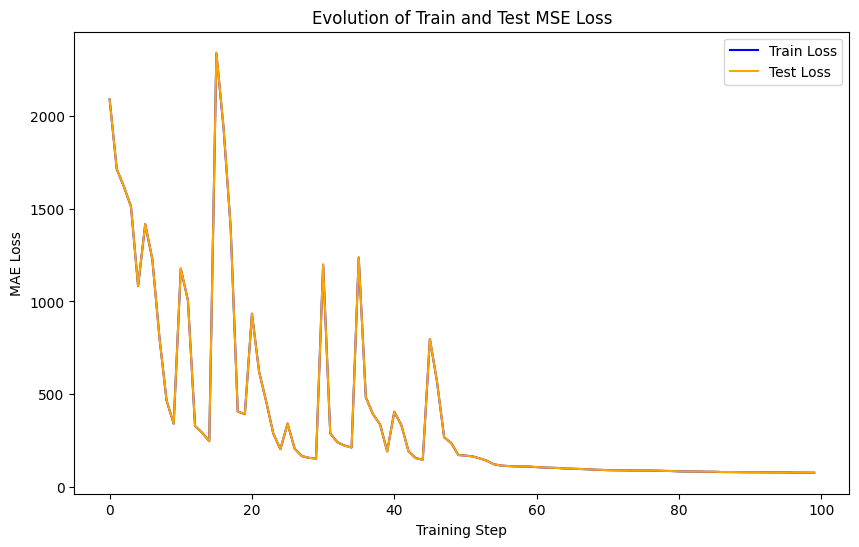

In [ ]:


# Assuming results['train_mse'] and results['test_mse'] are lists of MSE values for each training step
#train_losses = results['train_mae']
#test_losses = results['test_mae']
train_losses = results['train_mse']
test_losses = results['test_mse']
# Plot the evolution of train and test loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss", color="blue")
plt.plot(test_losses, label="Test Loss", color="orange")
plt.xlabel("Training Step")
plt.ylabel("MAE Loss")
plt.title("Evolution of Train and Test MSE Loss")
plt.legend()
plt.show()


In [ ]:
# Save the plot to a specific location
save_path = '../Images/paper_img/traintest_LOSS.png'  # Change this path as needed
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
print("image saved at "+save_path)

image saved at ../Images/paper_img/traintest_LOSS.png


<Figure size 640x480 with 0 Axes>

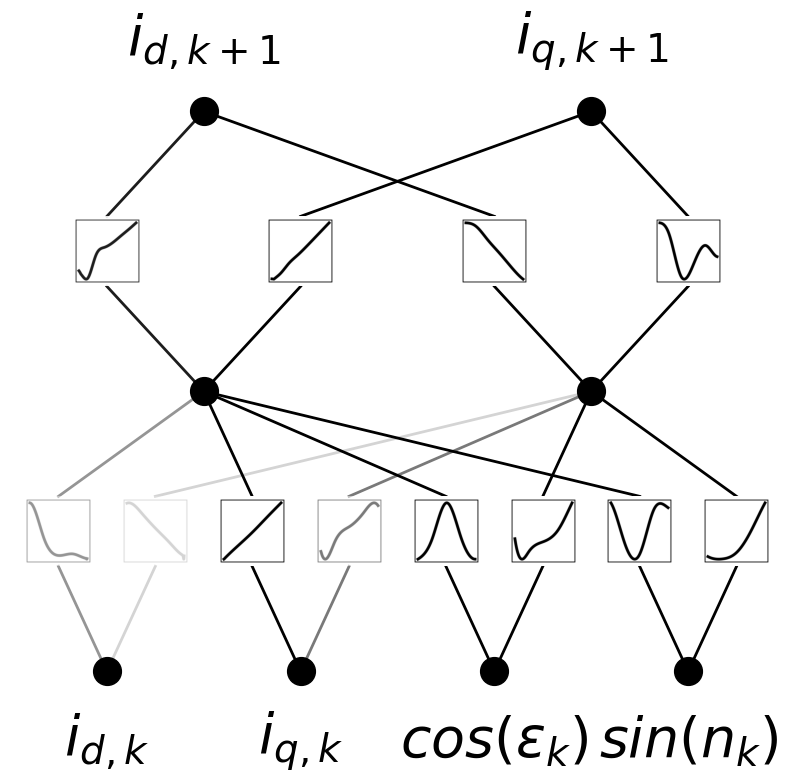

In [ ]:
kan_model.plot(folder="../Images/paper_img/kan/full.png",beta=50, scale=1,in_vars=[r'$i_{d,k}$', r'$i_{q,k}$',r'$cos(\epsilon_k)$',r'$sin(n_k)$'], out_vars=[r'$i_{d,k+1}$', r'$i_{q,k+1}$'])

In [ ]:
# prompt: Plot the Kan forecast agains tthe real value sof the test set

# Assuming 'results' contains the KAN forecast and 'model1_dataset' holds the test data.
#  'results' likely contains the predicted values from the KAN model.

# Access the true values (targets) from the test set
true_values = model1_dataset['test_label'].cpu().numpy() # Assuming 'test_label' holds the actual target values. Convert to numpy for plotting
# Step 1: Make predictions on the test set
with torch.no_grad():
    test_predictions = kan_model(model1_dataset['test_input'])

# Step 2: Convert tensors to NumPy arrays for plotting
kan_forecasts = test_predictions.cpu().numpy()


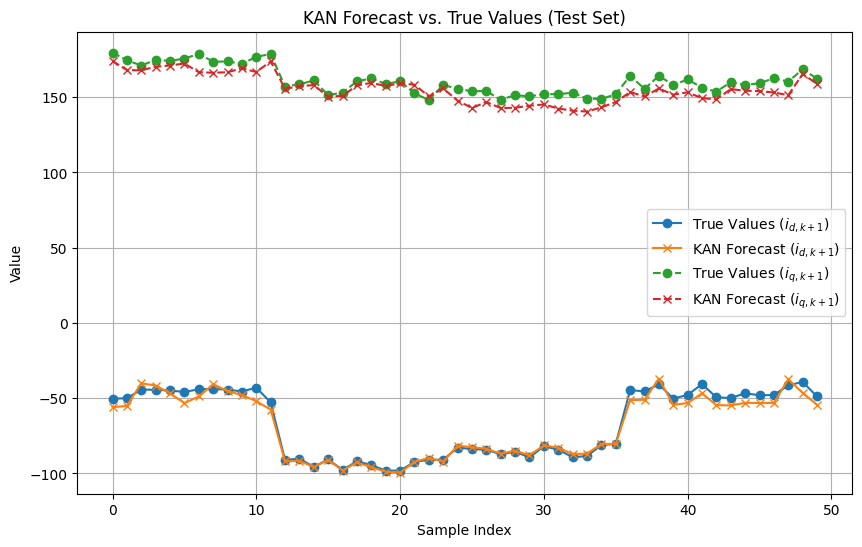

In [ ]:
interval=50
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the KAN forecasts against the true values
plt.plot(true_values[:interval, 0], label=r'True Values ($i_{d,k+1}$)', marker='o') # Plot id_k1
plt.plot(kan_forecasts[:interval, 0], label=r'KAN Forecast ($i_{d,k+1}$)', marker='x')

plt.plot(true_values[:interval, 1], label=r'True Values ($i_{q,k+1}$)', marker='o', linestyle='--') #Plot iq_k1
plt.plot(kan_forecasts[:interval,1], label=r'KAN Forecast ($i_{q,k+1}$)', marker='x', linestyle='--')

# Customize the plot
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('KAN Forecast vs. True Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the plot to a specific location
save_path = '../Images/paper_img/reality_vs_Kan_zoomed.png'  # Change this path as needed
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
print("image saved at "+save_path)

image saved at ../Images/paper_img/reality_vs_Kan_zoomed.png


<Figure size 640x480 with 0 Axes>

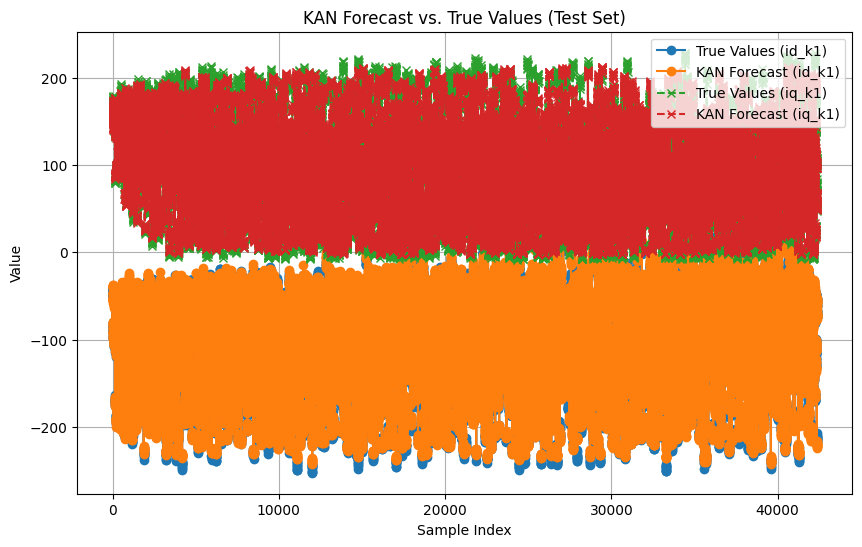

In [ ]:
interval=-1
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the KAN forecasts against the true values
plt.plot(true_values[:interval, 0], label='True Values (id_k1)', marker='o') # Plot id_k1
plt.plot(kan_forecasts[:interval, 0], label='KAN Forecast (id_k1)', marker='o')

plt.plot(true_values[:interval, 1], label='True Values (iq_k1)', marker='x', linestyle='--') #Plot iq_k1
plt.plot(kan_forecasts[:interval,1], label='KAN Forecast (iq_k1)', marker='x', linestyle='--')

# Customize the plot
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('KAN Forecast vs. True Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the plot to a specific location
save_path = '../Images/paper_img/reality_vs_Kan.png'  # Change this path as needed
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')
print("image saved at "+save_path)

image saved at ../Images/paper_img/reality_vs_Kan.png


<Figure size 640x480 with 0 Axes>

In [ ]:
torch.save({
    'model_state_dict': kan_model.state_dict(),
    'acts': kan_model.acts, 
    'spline_postacts':kan_model.spline_postacts,
    'acts_scale':kan_model.acts_scale
}, '../Models/Kan_full.pth') # path of attributes
print("Kan model saved")

Kan model saved


In [ ]:
import moviepy.video.io.ImageSequenceClip

video_name='video'
fps=10

fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile("..\Videos\\"+video_name+".mp4")

MoviePy - Building video ..\Videos\video.mp4.
MoviePy - Writing video ..\Videos\video.mp4



MoviePy - Done !
MoviePy - video ready ..\Videos\video.mp4


In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

4744249